# Helper functions

In [ ]:
def printStats(y_test, prediction):
  roc = roc_auc_score(y_test, prediction)
  precision = precision_score(y_test, prediction, average=None)
  recall = recall_score(y_test, prediction, average=None)
  fmeasure = f1_score(y_test, prediction, average=None)

  ConfusionMatrixDisplay.from_predictions(y_test, prediction)
  print(confusion_matrix(prediction, y_test).ravel())
  print("ROC " + str(roc))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("F1-Score: " + str(fmeasure)) 

# Load Data

In [1]:
data_path = './creditcard.csv'

In [3]:
import pandas as pd

def load_creditcard():
    df = pd.read_csv(data_path)
    return df

data = load_creditcard()

## Half dataset

In [4]:
from sklearn.model_selection import train_test_split

rstate = 1

x3, y3 = data.loc[:, ~data.columns.isin(['Class', 'Time'])], data['Class']
x_to_use, x_to_ignore, y_to_use, y_to_ignore = train_test_split(x3, y3, random_state=rstate, test_size=0.5)
x_train, x_test, y_train, y_test = train_test_split(x_to_use, y_to_use, random_state=rstate)

## Undersampling data

In [5]:
# Split the data based on whether it is malicious or not.
data_malicious = data.loc[data['Class'] == 1]
data_safe = data.loc[data['Class'] == 0]
# print(data_malicious, data_safe)
# print(data_malicious.shape[0])

data_safe_undersampled = data_safe.sample(n=data_malicious.shape[0], random_state = rstate)
data_undersampled = pd.concat([data_malicious, data_safe_undersampled], axis = 0)

x_us, y_us = data_undersampled.loc[:, ~data_undersampled.columns.isin(['Class', 'Time'])], data_undersampled['Class']
x_us_train, x_us_test, y_us_train, y_us_test = train_test_split(x_us, y_us, random_state=rstate)


## Small dataset with same ratio

In [6]:
small_ds_size = data_undersampled.shape[0]
malicious_number = 20

mal_entries = data[data['Class'] == 1].sample(n = malicious_number, random_state=rstate)
safe_entries = data[data['Class'] == 0].sample((small_ds_size - malicious_number), random_state=rstate)
data_small = pd.concat([mal_entries, safe_entries], axis = 0)
# print("malicious ratio = ", len(data_small[data_small['Class']==1]))

x_small, y_small = data_small.loc[:, ~data_small.columns.isin(['Class', 'Time'])], data_small['Class']
x_small_train, x_small_test, y_small_train, y_small_test = train_test_split(x_small, y_small, random_state=rstate)

# Classifiers

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


## Ensemble 1
* Neural Net MLP
* K-Neighbours
* Linear SVM
* Decision Tree



In [ ]:
estimators1 = [
  ('mlp', MLPClassifier(alpha=1, max_iter=1000)),
  ("kn", KNeighborsClassifier()),
  ("lsvm", SVC(kernel="linear", C=0.025)),
  ('dtc', DecisionTreeClassifier(max_depth=5)), 
]

In [ ]:
clf1 = StackingClassifier(estimators=estimators1, stack_method="auto", final_estimator=LogisticRegression())
clf1.fit(x_train, y_train)

StackingClassifier(estimators=[('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier()),
                               ('lsvm', SVC(C=0.025, kernel='linear')),
                               ('dtc', DecisionTreeClassifier(max_depth=5))],
                   final_estimator=LogisticRegression())

In [ ]:
clf1_us = StackingClassifier(estimators=estimators1, stack_method="auto", final_estimator=LogisticRegression())
clf1_us.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier()),
                               ('lsvm', SVC(C=0.025, kernel='linear')),
                               ('dtc', DecisionTreeClassifier(max_depth=5))],
                   final_estimator=LogisticRegression())

In [ ]:
clf1_small = StackingClassifier(estimators=estimators1, stack_method="auto", final_estimator=LogisticRegression())
clf1_small.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier()),
                               ('lsvm', SVC(C=0.025, kernel='linear')),
                               ('dtc', DecisionTreeClassifier(max_depth=5))],
                   final_estimator=LogisticRegression())

In [ ]:
predClf1 = clf1.predict(x_test)
predClf1Us = clf1_us.predict(x_us_test)
predClf1Small = clf1_small.predict(x_small_test)

[35536    10     8    47]
ROC 0.9121681651799992
Precision: [0.99971867 0.85454545]
Recall: [0.99977493 0.8245614 ]
F1-Score: [0.9997468  0.83928571]


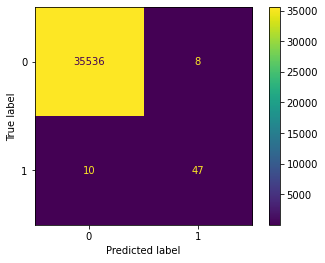

In [ ]:
printStats(y_test, predClf1)

[129   9   3 105]
ROC 0.9491626794258373
Precision: [0.93478261 0.97222222]
Recall: [0.97727273 0.92105263]
F1-Score: [0.95555556 0.94594595]


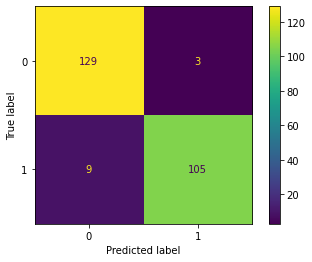

In [ ]:
printStats(y_us_test, predClf1Us)

[238   2   0   6]
ROC 0.875
Precision: [0.99166667 1.        ]
Recall: [1.   0.75]
F1-Score: [0.9958159  0.85714286]


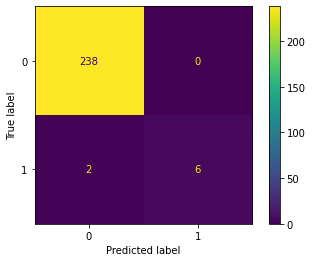

In [ ]:
printStats(y_small_test, predClf1Small)

## Ensemble 2

* Neural Net MLP
* KNeighbours
* Linear SVM
* Decision Tree
* Naive Bayes

In [ ]:
estimators2 = [
  ('mlp', MLPClassifier(alpha=1, max_iter=1000)),
  ("kn", KNeighborsClassifier()),
  ("lsvm", SVC(kernel="linear", C=0.025)),
  ('dtc', DecisionTreeClassifier(max_depth=5)), 
  ("nb", GaussianNB())
]


In [ ]:
clf2 = StackingClassifier(estimators=estimators2, stack_method="auto", final_estimator=LogisticRegression())
clf2.fit(x_train, y_train)

StackingClassifier(estimators=[('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier()),
                               ('lsvm', SVC(C=0.025, kernel='linear')),
                               ('dtc', DecisionTreeClassifier(max_depth=5)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
clf2_us = StackingClassifier(estimators=estimators2, stack_method="auto", final_estimator=LogisticRegression())
clf2_us.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier()),
                               ('lsvm', SVC(C=0.025, kernel='linear')),
                               ('dtc', DecisionTreeClassifier(max_depth=5)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
clf2_small = StackingClassifier(estimators=estimators2, stack_method="auto", final_estimator=LogisticRegression())
clf2_small.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier()),
                               ('lsvm', SVC(C=0.025, kernel='linear')),
                               ('dtc', DecisionTreeClassifier(max_depth=5)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
predClf2 = clf2.predict(x_test)
predClf2Us = clf2_us.predict(x_us_test)
predClf2Small = clf2_small.predict(x_small_test)

[35537    10     7    47]
ROC 0.9121822322517976
Precision: [0.99971868 0.87037037]
Recall: [0.99980306 0.8245614 ]
F1-Score: [0.99976087 0.84684685]


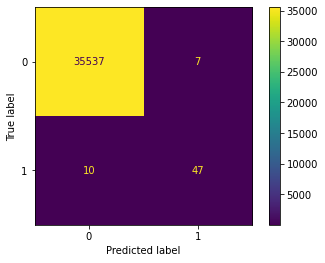

In [ ]:
printStats(y_test, predClf2)

[129   9   3 105]
ROC 0.9491626794258373
Precision: [0.93478261 0.97222222]
Recall: [0.97727273 0.92105263]
F1-Score: [0.95555556 0.94594595]


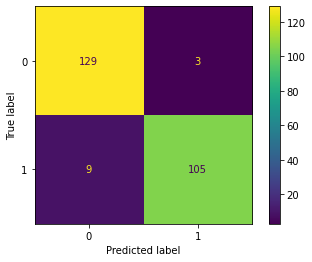

In [ ]:
printStats(y_us_test, predClf2Us)

[238   2   0   6]
ROC 0.875
Precision: [0.99166667 1.        ]
Recall: [1.   0.75]
F1-Score: [0.9958159  0.85714286]


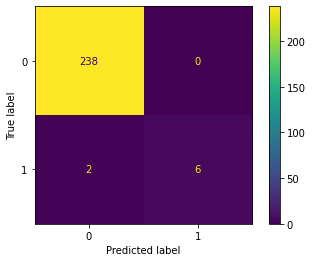

In [ ]:
printStats(y_small_test, predClf2Small)

## Ensemble 3
* AdaBoost
* Random Forest
* XG Boost
* KNeighbours

In [ ]:
estimators3 = [
  ('ada', AdaBoostClassifier(n_estimators=7, base_estimator=DecisionTreeClassifier(max_depth=5))),
  ('rf', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
  ("xgb", xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.3)),
  ("kn", KNeighborsClassifier())
]

In [ ]:
clf3 = StackingClassifier(estimators=estimators3, stack_method="auto", final_estimator=LogisticRegression())
clf3.fit(x_train, y_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('kn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
clf3_us = StackingClassifier(estimators=estimators3, stack_method="auto", final_estimator=LogisticRegression())
clf3_us.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('kn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
clf3_small = StackingClassifier(estimators=estimators3, stack_method="auto", final_estimator=LogisticRegression())
clf3_small.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('kn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
predClf3 = clf3.predict(x_test)
predClf3Us = clf3_us.predict(x_us_test)
predClf3Small = clf3_small.predict(x_small_test)

[35543    10     1    47]
ROC 0.9122666346825875
Precision: [0.99971873 0.97916667]
Recall: [0.99997187 0.8245614 ]
F1-Score: [0.99984528 0.8952381 ]


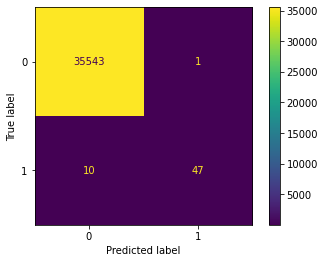

In [ ]:
printStats(y_test, predClf3)

[130  12   2 102]
ROC 0.9397926634768741
Precision: [0.91549296 0.98076923]
Recall: [0.98484848 0.89473684]
F1-Score: [0.94890511 0.93577982]


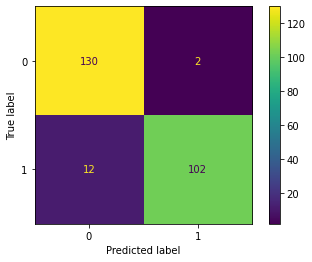

In [ ]:
printStats(y_us_test, predClf3Us)

[238   4   0   4]
ROC 0.75
Precision: [0.98347107 1.        ]
Recall: [1.  0.5]
F1-Score: [0.99166667 0.66666667]


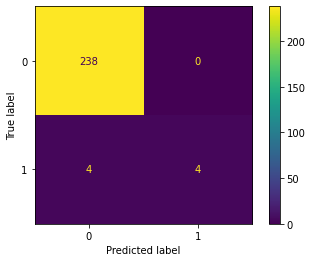

In [ ]:
printStats(y_small_test, predClf3Small)

## Ensemble 4
* AdaBoost
* Random Forest
* XG Boost
* KNeighbours
* Naive Bayes

In [ ]:
estimators4 = [
  ('ada', AdaBoostClassifier(n_estimators=7, base_estimator=DecisionTreeClassifier(max_depth=5))),
  ('mlp', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
  ("xgb", xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.3)),
  ("kn", KNeighborsClassifier()), 
  ("nb", GaussianNB())
]

In [ ]:
clf4 = StackingClassifier(estimators=estimators4, stack_method="auto", final_estimator=LogisticRegression())
clf4.fit(x_train, y_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('mlp',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('kn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
clf4_us = StackingClassifier(estimators=estimators4, stack_method="auto", final_estimator=LogisticRegression())
clf4_us.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('mlp',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('kn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
clf4_small = StackingClassifier(estimators=estimators4, stack_method="auto", final_estimator=LogisticRegression())
clf4_small.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('mlp',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('kn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
predClf4 = clf4.predict(x_test)
predClf4Us = clf4_us.predict(x_us_test)
predClf4Small = clf4_small.predict(x_small_test)

[35543     9     1    48]
ROC 0.921038564507149
Precision: [0.99974685 0.97959184]
Recall: [0.99997187 0.84210526]
F1-Score: [0.99985935 0.90566038]


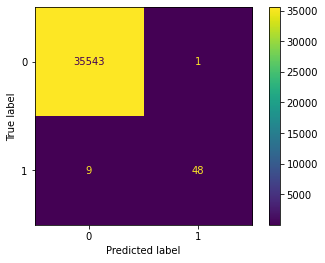

In [ ]:
printStats(y_test, predClf4)

[130  11   2 103]
ROC 0.9441786283891547
Precision: [0.92198582 0.98095238]
Recall: [0.98484848 0.90350877]
F1-Score: [0.95238095 0.94063927]


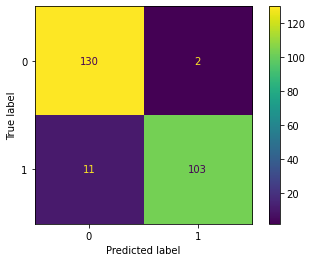

In [ ]:
printStats(y_us_test, predClf4Us)

[238   2   0   6]
ROC 0.875
Precision: [0.99166667 1.        ]
Recall: [1.   0.75]
F1-Score: [0.9958159  0.85714286]


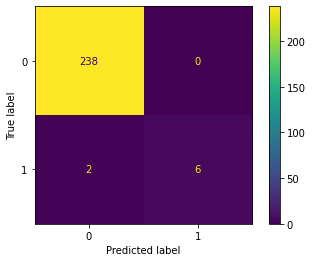

In [ ]:
printStats(y_small_test, predClf4Small)

# Combination of boosting classifiers

In [ ]:
boostEstimators = [
  ('ada', AdaBoostClassifier(n_estimators=7, base_estimator=DecisionTreeClassifier(max_depth=5))),
  ("gb", GradientBoostingClassifier(n_estimators=10,max_depth=5)),
  ("xgb", xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.3)),
]

In [ ]:
clfBoost = StackingClassifier(estimators=boostEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfBoost.fit(x_train, y_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror'))],
                   final_estimator=LogisticRegression())

In [ ]:
clfBoostUs = StackingClassifier(estimators=boostEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfBoostUs.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror'))],
                   final_estimator=LogisticRegression())

In [ ]:
clfBoostSmall = StackingClassifier(estimators=boostEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfBoostSmall.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror'))],
                   final_estimator=LogisticRegression())

In [ ]:
predBoost = clfBoost.predict(x_test)
predBoostUs = clfBoostUs.predict(x_us_test)
predBoostSmall = clfBoostSmall.predict(x_small_test)

[35542     7     2    50]
ROC 0.9385683570844735
Precision: [0.99980309 0.96153846]
Recall: [0.99994373 0.87719298]
F1-Score: [0.99987341 0.91743119]


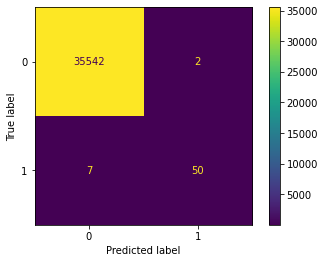

In [ ]:
printStats(y_test, predBoost)

[131  13   1 101]
ROC 0.939194577352472
Precision: [0.90972222 0.99019608]
Recall: [0.99242424 0.88596491]
F1-Score: [0.94927536 0.93518519]


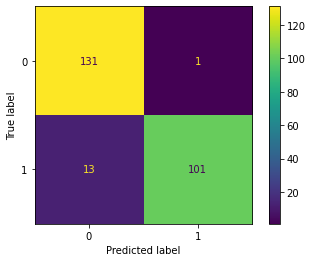

In [ ]:
printStats(y_us_test, predBoostUs)

[238   4   0   4]
ROC 0.75
Precision: [0.98347107 1.        ]
Recall: [1.  0.5]
F1-Score: [0.99166667 0.66666667]


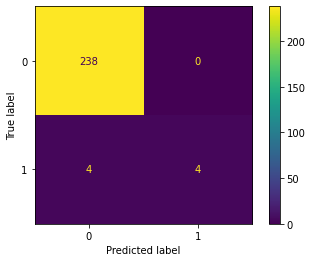

In [ ]:
printStats(y_small_test, predBoostSmall)

# Ensembles using best, worst and worst / best

## Combination of best (strong) classifiers

In [ ]:
bestEstimators = [
  ('dtc', DecisionTreeClassifier(max_depth=5)), 
  ('ada', AdaBoostClassifier(n_estimators=7, base_estimator=DecisionTreeClassifier(max_depth=5))),
  ("gb", GradientBoostingClassifier(n_estimators=10,max_depth=5)),
  ("xgb", xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.3)),
  ("lsvm", SVC(kernel="linear", C=0.025)),                  
]

In [ ]:
clfBest = StackingClassifier(estimators=bestEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfBest.fit(x_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(max_depth=5)),
                               ('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('lsvm', SVC(C=0.025, kernel='linear'))],
                   final_estimator=LogisticRegression())

In [ ]:
clfBestUs = StackingClassifier(estimators=bestEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfBestUs.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(max_depth=5)),
                               ('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('lsvm', SVC(C=0.025, kernel='linear'))],
                   final_estimator=LogisticRegression())

In [ ]:
clfBestSmall = StackingClassifier(estimators=bestEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfBestSmall.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(max_depth=5)),
                               ('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                                   n_estimators=7)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('lsvm', SVC(C=0.025, kernel='linear'))],
                   final_estimator=LogisticRegression())

In [ ]:
predBest = clfBest.predict(x_test)
predBestUs = clfBestUs.predict(x_us_test)
predBestSmall = clfBestSmall.predict(x_small_test)


[35543     8     1    49]
ROC 0.9298104943317105
Precision: [0.99977497 0.98      ]
Recall: [0.99997187 0.85964912]
F1-Score: [0.99987341 0.91588785]


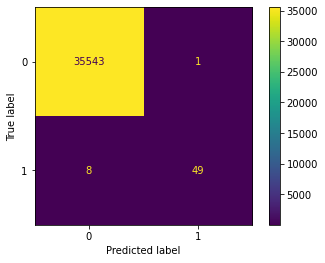

In [ ]:
printStats(y_test, predBest)

[130  11   2 103]
ROC 0.9441786283891547
Precision: [0.92198582 0.98095238]
Recall: [0.98484848 0.90350877]
F1-Score: [0.95238095 0.94063927]


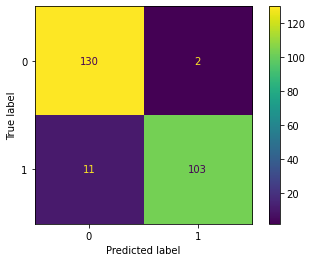

In [ ]:
printStats(y_us_test, predBestUs)

[238   2   0   6]
ROC 0.875
Precision: [0.99166667 1.        ]
Recall: [1.   0.75]
F1-Score: [0.9958159  0.85714286]


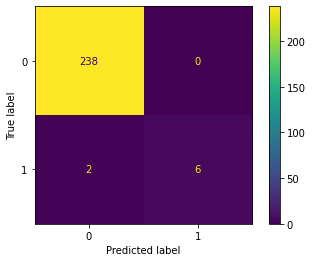

In [ ]:
printStats(y_small_test, predBestSmall)


## Combination of worst classifiers

In [ ]:
worstEstimators = [
  ("nb", GaussianNB()),
  ('rf', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
  ('mlp', MLPClassifier(alpha=1, max_iter=1000)),
  ("kn", KNeighborsClassifier()), 
]

In [ ]:
clfWorst = StackingClassifier(estimators=worstEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfWorst.fit(x_train, y_train)

StackingClassifier(estimators=[('nb', GaussianNB()),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
clfWorstUs = StackingClassifier(estimators=worstEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfWorstUs.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('nb', GaussianNB()),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
clfWorstSmall = StackingClassifier(estimators=worstEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfWorstSmall.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('nb', GaussianNB()),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('mlp', MLPClassifier(alpha=1, max_iter=1000)),
                               ('kn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
predWorst = clfWorst.predict(x_test)
predWorstUs = clfWorstUs.predict(x_us_test)
predWorstSmall = clfWorstSmall.predict(x_small_test)

[35538    11     6    46]
ROC 0.9034243694990345
Precision: [0.99969057 0.88461538]
Recall: [0.9998312  0.80701754]
F1-Score: [0.99976088 0.8440367 ]


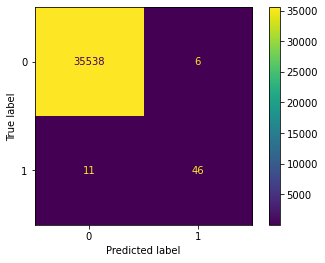

In [ ]:
printStats(y_test, predWorst)

[128   9   4 105]
ROC 0.9453748006379585
Precision: [0.93430657 0.96330275]
Recall: [0.96969697 0.92105263]
F1-Score: [0.95167286 0.94170404]


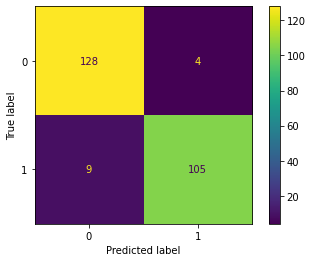

In [ ]:
printStats(y_us_test, predWorstUs)

[237   2   1   6]
ROC 0.8728991596638656
Precision: [0.9916318  0.85714286]
Recall: [0.99579832 0.75      ]
F1-Score: [0.99371069 0.8       ]


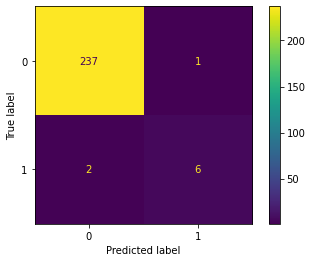

In [ ]:
printStats(y_small_test, predWorstSmall)

## Combination of worst and best

In [ ]:
worstAndBestEstimators = [
  ("gb", GradientBoostingClassifier(n_estimators=10,max_depth=5)),         
  ("xgb", xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.3)),
  ('rf', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
  ("kn", KNeighborsClassifier()),
  ("nb", GaussianNB())
]

In [ ]:
clfWorstBest = StackingClassifier(estimators=worstAndBestEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfWorstBest.fit(x_train, y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('kn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
clfWorstBestUs = StackingClassifier(estimators=worstAndBestEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfWorstBestUs.fit(x_us_train, y_us_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('kn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
clfWorstBestSmall = StackingClassifier(estimators=worstAndBestEstimators, stack_method="auto", final_estimator=LogisticRegression())
clfWorstBestSmall.fit(x_small_train, y_small_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=10)),
                               ('xgb',
                                XGBClassifier(learning_rate=0.3,
                                              objective='reg:squarederror')),
                               ('rf',
                                RandomForestClassifier(max_depth=5,
                                                       max_features=1,
                                                       n_estimators=10)),
                               ('kn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
predWorstBest = clfWorstBest.predict(x_test)
predWorstBestUs = clfWorstBestUs.predict(x_us_test)
predWorstBestSmall = clfWorstBestSmall.predict(x_small_test)

[35541     8     3    49]
ROC 0.9297823601881138
Precision: [0.99977496 0.94230769]
Recall: [0.9999156  0.85964912]
F1-Score: [0.99984527 0.89908257]


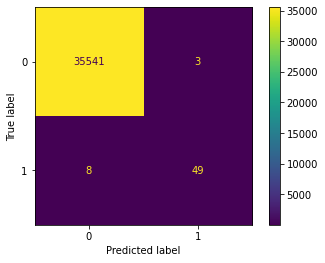

In [ ]:
printStats(y_test, predWorstBest)

[131  11   1 103]
ROC 0.9479665071770335
Precision: [0.92253521 0.99038462]
Recall: [0.99242424 0.90350877]
F1-Score: [0.95620438 0.94495413]


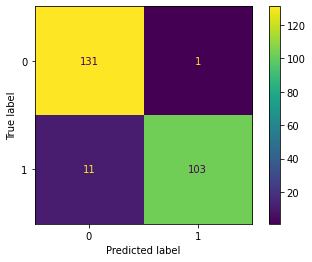

In [ ]:
printStats(y_us_test, predWorstBestUs)

[238   1   0   7]
ROC 0.9375
Precision: [0.9958159 1.       ]
Recall: [1.    0.875]
F1-Score: [0.99790356 0.93333333]


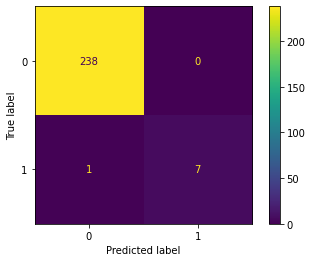

In [ ]:
printStats(y_small_test, predWorstBestSmall)